# Features ... per customer

# 1. SETTINGS

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats
from datetime import datetime
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas('PROGRESS>>>')

In [2]:
%matplotlib inline

In [3]:
# import datasets
test  = pd.read_csv("../data/raw/Challenge_20180423.csv")
cust  = pd.read_csv("../data/raw/Customer.csv")
bond  = pd.read_csv("../data/raw/Isin.csv")
markt = pd.read_csv("../data/raw/Market.csv")
macro = pd.read_csv("../data/raw/MarketData_Macro.csv")
trade = pd.read_csv("../data/raw/Trade.csv")

In [4]:
# pandas options
pd.set_option("display.max_columns", None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# garbage collection
import gc
gc.enable()

In [5]:
trade.columns

Index(['TradeDateKey', 'CustomerIdx', 'IsinIdx', 'BuySell', 'NotionalEUR',
       'Price', 'TradeStatus', 'CustomerInterest'],
      dtype='object')

# Pre-processing

In [6]:
train = trade[['TradeDateKey','BuySell', 'NotionalEUR', 'Price', 'CustomerInterest']]
train['BuySell'][train['BuySell']=='Buy'] = 0
train['BuySell'][train['BuySell']=='Sell'] = 1
train.head()

,TradeDateKey,BuySell,NotionalEUR,Price,CustomerInterest
0,20161207,1,653168.0,0.0,1.0
1,20170329,0,1656487.0,0.0,1.0
2,20170418,0,939673.0,0.0,1.0
3,20170310,1,708082.0,0.0,1.0
4,20161116,0,1147709.0,0.0,1.0


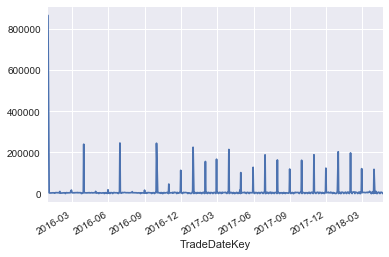

In [7]:
train['TradeDateKey'] = pd.to_datetime(train['TradeDateKey'], format='%Y%m%d', errors='ignore')
train.groupby(['TradeDateKey'])['BuySell'].count().plot()

In [14]:
train['year'] = train['TradeDateKey'].dt.year
train['month'] = train['TradeDateKey'].dt.month
train['day'] = train['TradeDateKey'].dt.day
train_ind = int(len(train)*0.7)
train = train.sort_values(by='TradeDateKey')
X_train = train[['BuySell', 'NotionalEUR', 'year', 'month', 'day']].iloc[:train_ind, :] #'Price',
X_test = train[['BuySell', 'NotionalEUR',  'year', 'month', 'day']].iloc[train_ind:, :] #'Price',
y_train = train[['CustomerInterest']].iloc[:train_ind, :]
y_test = train[['CustomerInterest']].iloc[train_ind:, :]

In [16]:
#Price has too many missing values aroung 75% - therefore was not included

# Modeling

In [19]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [85]:
losses = []
print('Training our model')

for c in [1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]:
    print(f'Training for c = {c}')
    classifier = LogisticRegression(C=c)
    classifier.fit(X_train, y_train)
    probs = classifier.predict_proba(X_test)[:,1]
    loss = roc_auc_score(y_test, probs)
    print(f'AUC for c = {c} is {loss}')
    losses.append(loss)

Training our model
Training for c = 1.5
AUC for c = 1.5 is 0.29545119819021703
Training for c = 2
AUC for c = 2 is 0.29545119819021703
Training for c = 2.5
AUC for c = 2.5 is 0.29545119819021703
Training for c = 3
AUC for c = 3 is 0.29545119819021703
Training for c = 3.5
AUC for c = 3.5 is 0.29545119819021703
Training for c = 4
AUC for c = 4 is 0.29545119819021703
Training for c = 4.5
AUC for c = 4.5 is 0.29545119819021703
Training for c = 5
AUC for c = 5 is 0.29545119819021703
